# Trial Exploratory Data Analysis

## Breaking down the task

1. Vizualize all variables
2. What variable can select `log_day_sequence < 2`

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/data_sample.csv')

In [3]:
df.head()

,Unnamed: 0,episode_type,episode_id,show_id,user_id,log_date,view_start_time,view_end_time,view_percent,log_day_sequence
0,0,a,ep00000002,s00000002,uu00000002,2024-02-01,2024-02-01 12:13:10,2024-02-01 12:13:24,0.000,1
1,1,a,ep00000002,s00000002,uu00000016,2024-02-02,2024-02-02 23:32:55,2024-02-02 23:34:01,9.091,1
2,2,a,ep00000002,s00000002,uu00000049,2024-02-03,2024-02-03 12:37:43,2024-02-03 12:38:46,9.091,1
3,3,a,ep00000002,s00000002,uu00000050,2024-02-03,2024-02-03 20:59:06,2024-02-03 21:00:27,27.273,1
4,4,a,ep00000002,s00000002,uu00000050,2024-02-03,2024-02-03 20:56:40,2024-02-03 20:57:09,9.091,1


## `episode_type`

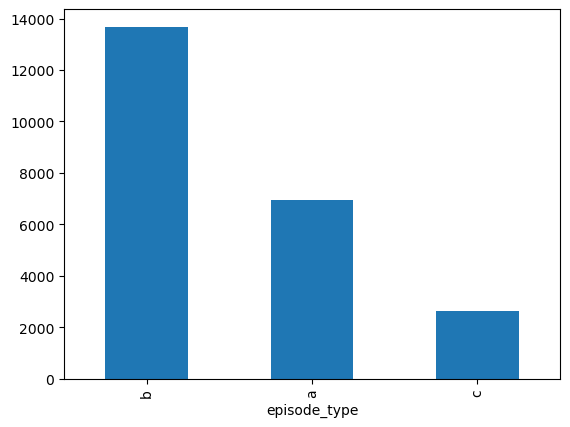

In [4]:
episode_types = df['episode_type'].value_counts()
episode_types.plot(kind = 'bar')
plt.show()

## `episode_id`


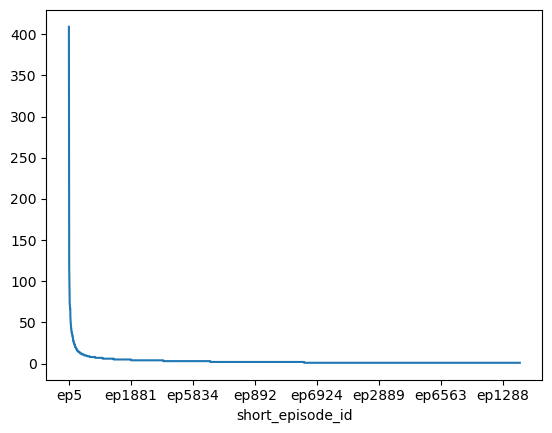

In [5]:
df['short_episode_id'] = df['episode_id'].str.replace(r'^ep0+', 'ep', regex = True)

short_episode_count = df['short_episode_id'].value_counts()
#plt.figure(figsize=(10,6), dpi=400)
short_episode_count.plot(kind = 'line')

#plt.xticks(ticks=range(len(df['short_episode_id'])), rotation=45)

plt.show()

## `show_id`

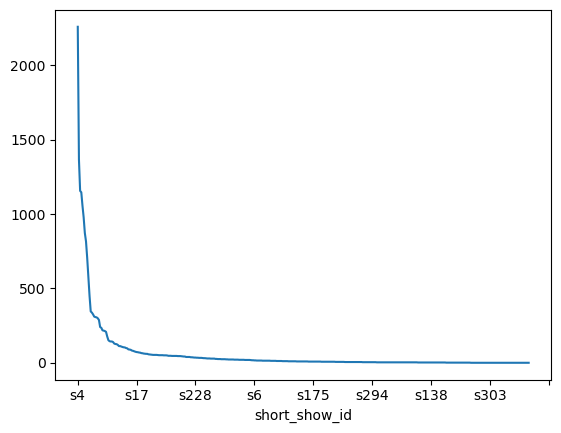

In [6]:
df['short_show_id'] = df['show_id'].str.replace(r'^s0+', 's', regex=True)

show_id_count = df['short_show_id'].value_counts()
show_id_count.plot(kind='line')

plt.show()

## `user_id`

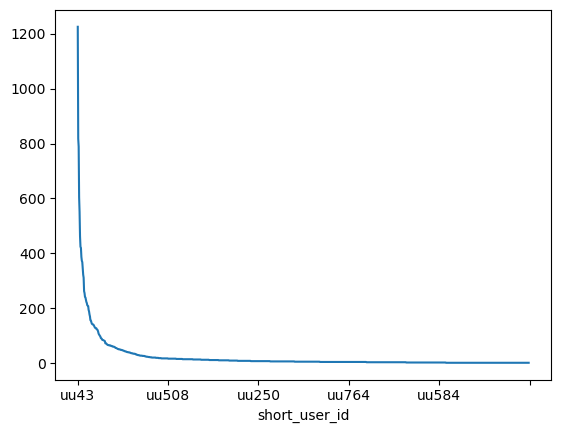

In [7]:
df['short_user_id'] = df['user_id'].str.replace(r'^uu0+', 'uu', regex=True)

user_id_count = df['short_user_id'].value_counts()
user_id_count.plot(kind='line')

plt.show()

## `log_date`

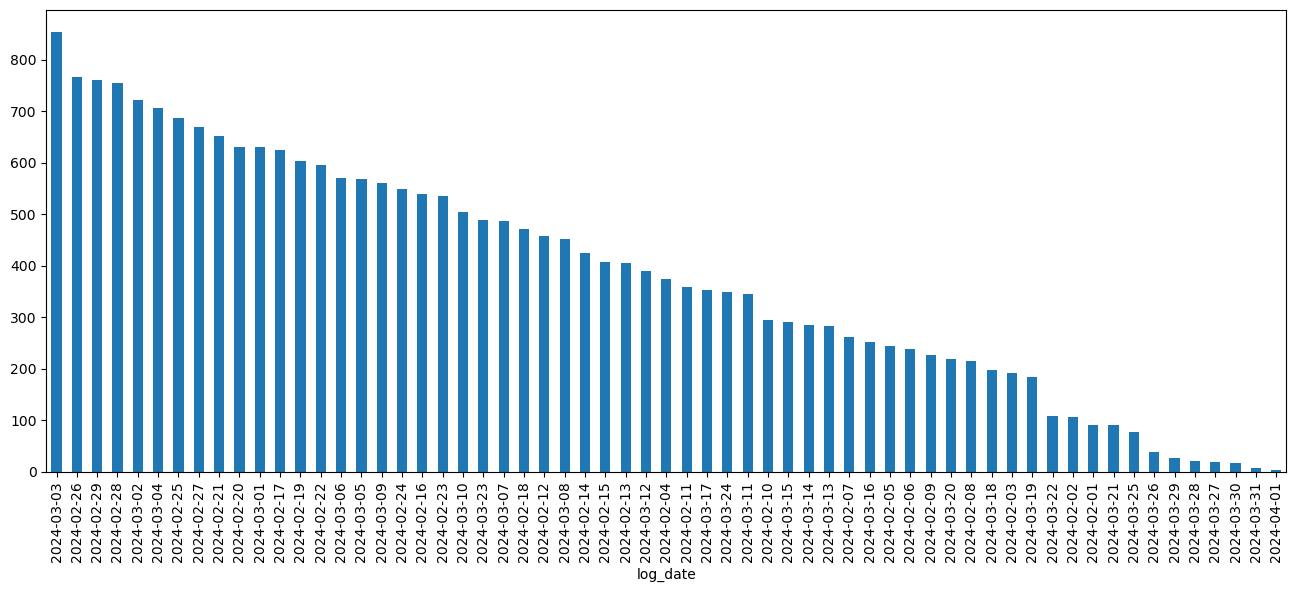

In [8]:
log_date_count = df['log_date'].value_counts()

plt.figure(figsize = (16, 6))
log_date_count.plot(kind='bar')

plt.show()

## `view_start_time`

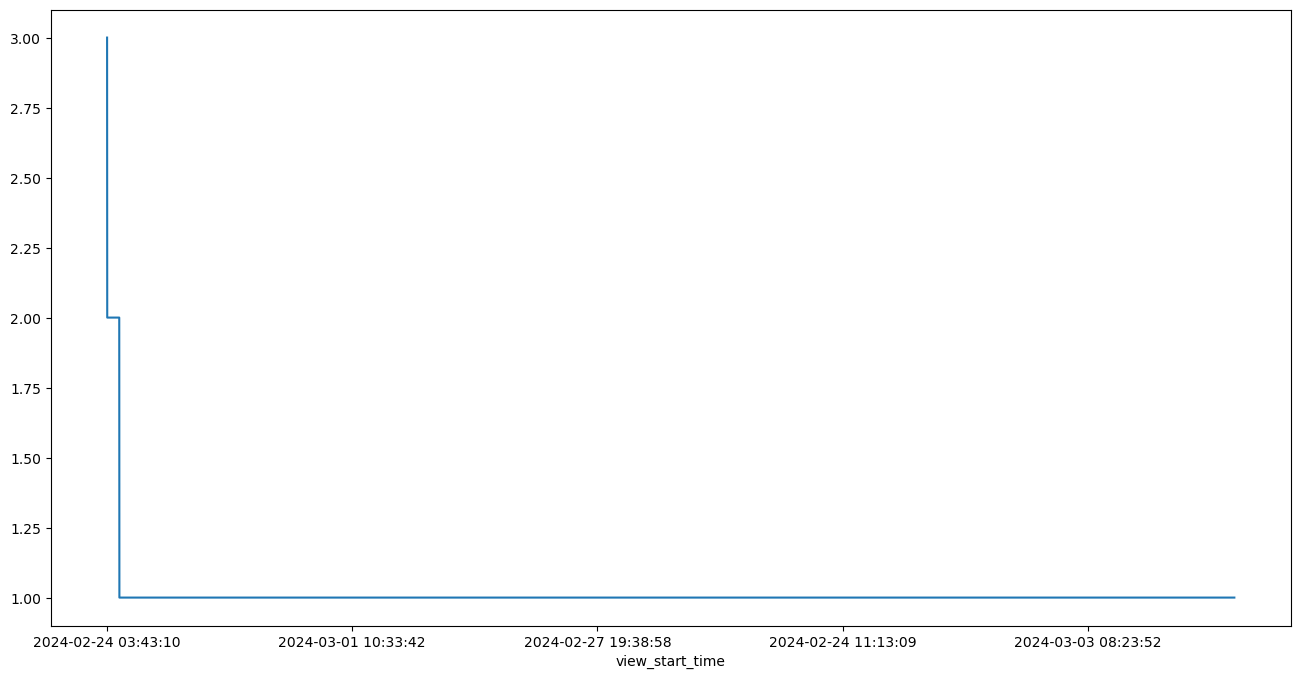

In [9]:
view_start_time_count = df['view_start_time'].value_counts()

plt.figure(figsize=(16,8))
view_start_time_count.plot(kind='line')
plt.show()

## `view_end_time`

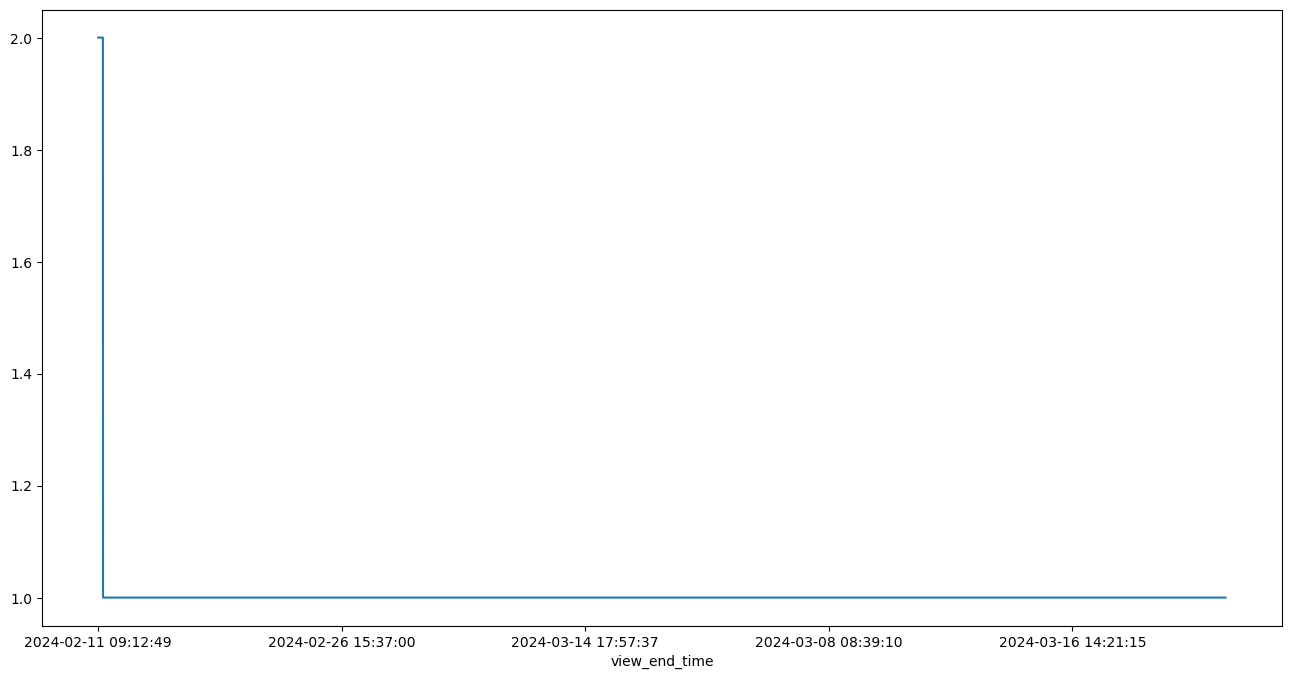

In [10]:
view_end_time_count = df['view_end_time'].value_counts()

plt.figure(figsize=(16,8))
view_end_time_count.plot(kind='line')
plt.show()

In [11]:
df['view_start_time'] = pd.to_datetime(df['view_start_time'])
df['view_end_time'] = pd.to_datetime(df['view_end_time'])
df['view_duration'] = df['view_end_time'] - df['view_start_time']

In [12]:
df['view_duration']

0       0 days 00:00:14
1       0 days 00:01:06
2       0 days 00:01:03
3       0 days 00:01:21
4       0 days 00:00:29
              ...      
23237   0 days 00:03:27
23238   0 days 00:03:20
23239   0 days 00:02:57
23240   0 days 00:02:09
23241   0 days 00:02:51
Name: view_duration, Length: 23242, dtype: timedelta64[ns]

## `view_duration`

<Axes: xlabel='view_duration'>

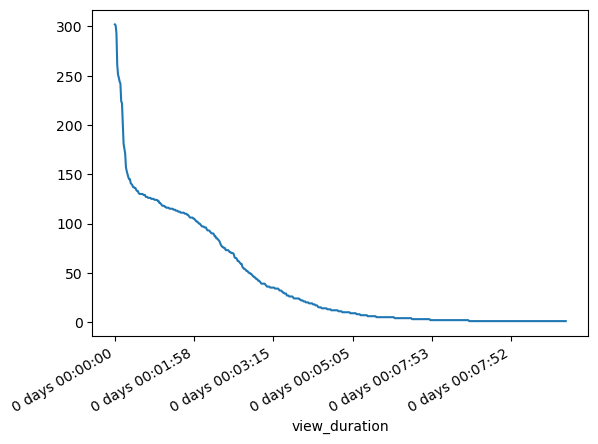

In [13]:
view_duration_count = df['view_duration'].value_counts()

view_duration_count.plot(kind='line')

## `view_percent`

<Axes: ylabel='Frequency'>

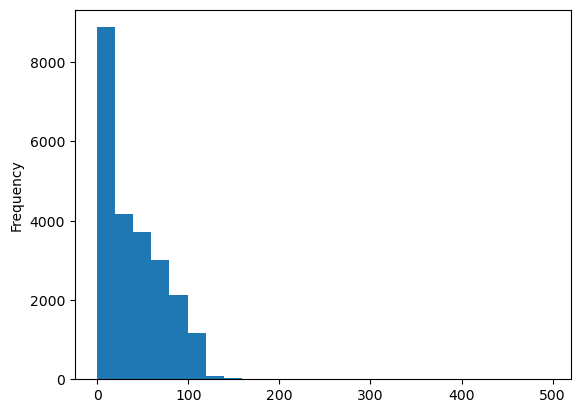

In [14]:
df['view_percent'].plot(kind='hist', bins = 25)

## `log_day_sequence`

<Axes: ylabel='Frequency'>

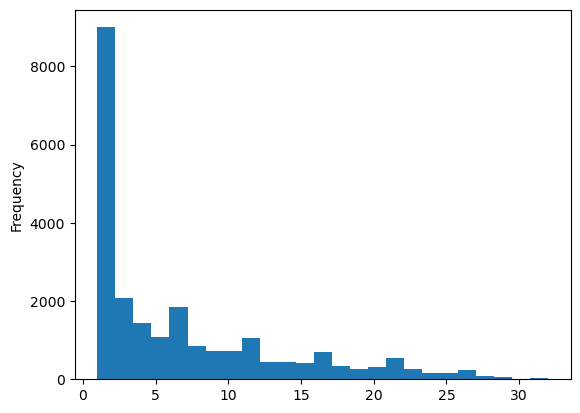

In [15]:
df['log_day_sequence'].plot(kind='hist', bins = 25)

## After Checking all variables

* How to find the content that is most popular?
* Is it relevant to know what users, `user_id` have the most `view_duration` ?
* How to get a Japanese Calendar for 2024 containing weekdays, holidays and weekends ?

### What `episode_type`, `show_id` and `episode_id` has the most `view_duration`, `log_day_sequence`?

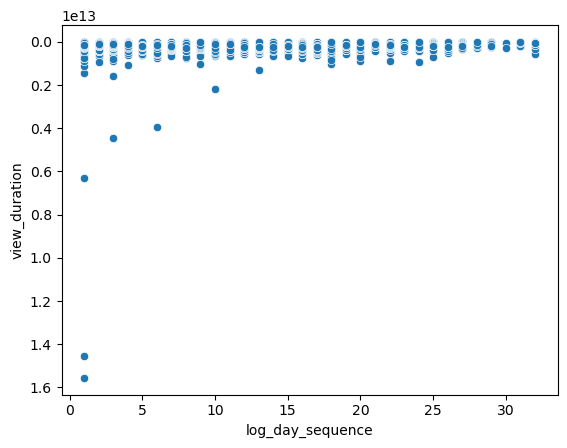

In [21]:
sns.scatterplot(x='log_day_sequence', y='view_duration', data=df)
plt.show()